<h1>Question 1

Temps dexécution :  0.003033876419067383
Temps dexécution :  0.028034448623657227
Temps dexécution :  0.28400158882141113


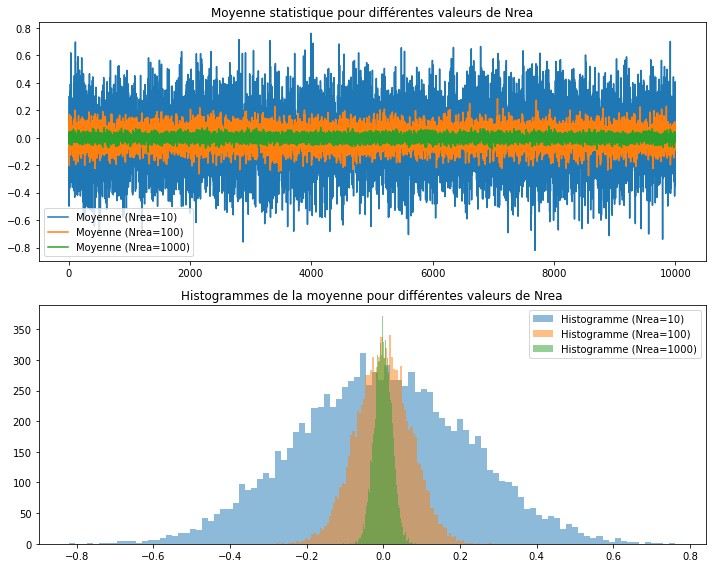

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def moyenne_stat(w0, Nrea, N, phi_max):
    n = np.arange(1, N + 1)
    Xmat = np.zeros((Nrea, N))
    Pmat= np.zeros((Nrea, N))
    
    # Mesurer le temps d'exécution
    start_time = time.time()
    
    for i in range(Nrea):
        phi = phi_max * np.random.rand(N)
        x = np.sin(n * w0 + phi)
        p = x * x
        Xmat[i, :] = x
        Pmat[i, :] = p
    
    Moy_vec = np.mean(Xmat, axis=0)
    
    end_time = time.time()
    print(f'Temps d''exécution : ' , end_time - start_time)

    return Moy_vec, Xmat, Pmat

w0 = 0.05 * np.pi
N = 10**4

# Affichage sur le même graphe pour différentes valeurs de Nrea
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

for Nrea in [10, 100, 1000]:
    moyenne, Xmat, _  = moyenne_stat(w0, Nrea, N, 2*np.pi)
    
    # Plot de la moyenne
    axes[0].plot(moyenne, label=f'Moyenne (Nrea={Nrea})')

    # Plot de l'histogramme pour chaque Nrea
    axes[1].hist(np.mean(Xmat, axis=0), bins=100, alpha=0.5, label=f'Histogramme (Nrea={Nrea})')

axes[0].set_title('Moyenne statistique pour différentes valeurs de Nrea')
axes[0].legend()

axes[1].set_title('Histogrammes de la moyenne pour différentes valeurs de Nrea')
axes[1].legend()

plt.tight_layout()
plt.show()


<h1>Question 1' 

Temps dexécution: 0.3810 secondes


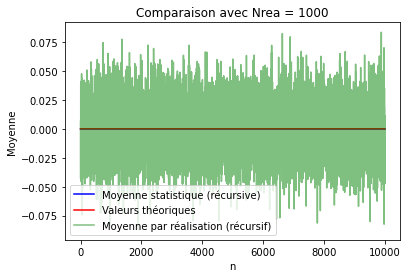

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

def moyenne_optimisee_recursive(w0, Nrea, N, phi_max):
    n_vec = np.arange(1, N + 1)
    S = np.zeros(N)
    moyenne_cumulative = np.zeros(N)
    
    start_time = time.time()
    
    for i in range(Nrea):
        phi_vect = phi_max * np.random.rand(N)
        x = np.sin(n_vec * w0 + phi_vect)
        S += x
        moyenne_cumulative = S / (i + 1)  # Mise à jour récursive de la moyenne

    end_time = time.time()

    plt.figure()
    plt.plot(np.mean(moyenne_cumulative) * np.ones(N), 'b', label='Moyenne statistique (récursive)')
    
    val_theo = np.mean(np.sin(n_vec * w0 + 0.25 * np.pi))
    plt.plot(val_theo * np.ones(N), 'r', label='Valeurs théoriques')

    # À commenter pour une meilleure visibilité
    plt.plot(moyenne_cumulative, 'g', alpha=0.5, label='Moyenne par réalisation (récursif)')
    # Fin du commentaire

    plt.legend()
    plt.title('Comparaison avec Nrea = {}'.format(Nrea))
    plt.xlabel('n')
    plt.ylabel('Moyenne')

    print('Temps d''exécution: {:.4f} secondes'.format(end_time - start_time))

w0 = 0.05 * np.pi
Nrea = 1000
N = 10000
phi_max = 2 * np.pi

moyenne_optimisee_recursive(w0, Nrea, N, phi_max)
plt.show()


<h1>Question 2

Temps dexécution :  0.3730032444000244


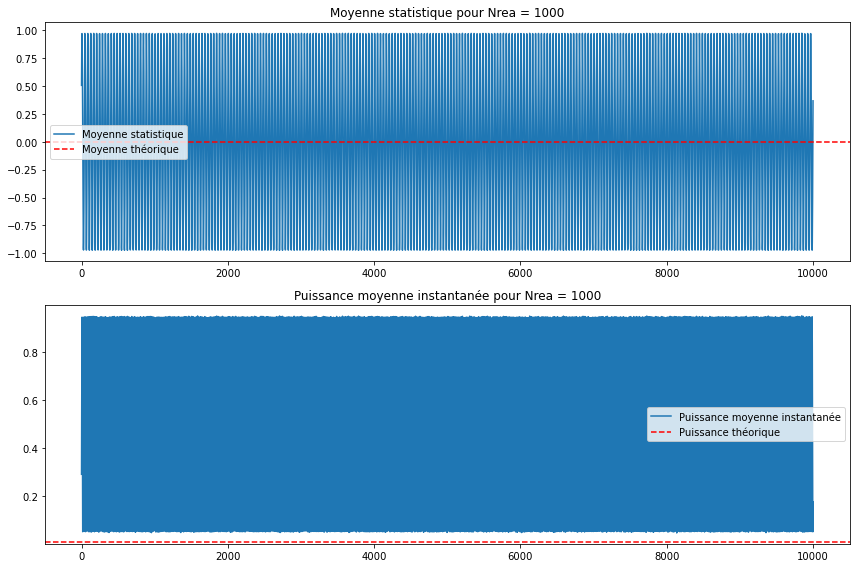

Temps dexécution: 0.3800 secondes


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time

def moyenne_stat_et_puissance(w0, Nrea, N, phi_max):
    start_time = time.time()
    moyenne, Xmat, Pmat  = moyenne_stat(w0, Nrea, N, phi_max)
    
    
    puissance_moyenne = np.mean(Pmat, axis=0)
    
    end_time = time.time()

    # Affichage des résultats
    plt.figure(figsize=(12, 8))
    
    # Moyenne statistique
    plt.subplot(2, 1, 1)
    plt.plot(moyenne, label='Moyenne statistique')
    plt.axhline(y=0, color='r', linestyle='--', label='Moyenne théorique')
    plt.title('Moyenne statistique pour Nrea = {}'.format(Nrea))
    plt.legend()

    # Puissance moyenne instantanée
    plt.subplot(2, 1, 2)
    plt.plot(puissance_moyenne, label='Puissance moyenne instantanée')
    amplitude_theorique = 0.5 * np.sin(w0) ** 2  
    plt.axhline(y=amplitude_theorique, color='r', linestyle='--', label='Puissance théorique')
    plt.title('Puissance moyenne instantanée pour Nrea = {}'.format(Nrea))
    plt.legend()

    plt.tight_layout()
    plt.show()

    print('Temps d''exécution: {:.4f} secondes'.format(end_time - start_time))

w0 = 0.05 * np.pi
Nrea = 1000
N = 10000
phi_max = np.pi / 4

moyenne_stat_et_puissance(w0, Nrea, N, phi_max)


<h1>Question 3

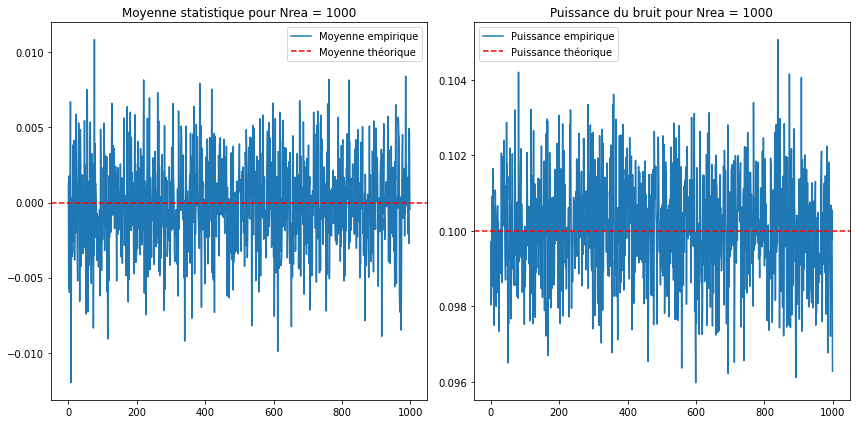

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time

def simuler_bruit(mean, variance, Nrea, N):
    noise_mat = np.random.normal(loc=mean, scale=np.sqrt(variance), size=(Nrea, N))
    
    # Calcul de la moyenne et de la puissance pour chaque réalisation
    moyennes = np.mean(noise_mat, axis=1)
    puissances = np.mean(noise_mat**2, axis=1)
    
    # Moyenne et puissance théoriques
    mean_theoretical = mean
    power_theoretical = variance + mean_theoretical**2
    
    # Affichage des résultats
    plt.figure(figsize=(12, 6))
    
    # Moyenne statistique
    plt.subplot(1, 2, 1)
    plt.plot(moyennes, label='Moyenne empirique')
    plt.axhline(y=mean_theoretical, color='r', linestyle='--', label='Moyenne théorique')
    plt.title('Moyenne statistique pour Nrea = {}'.format(Nrea))
    plt.legend()

    # Puissance du bruit
    plt.subplot(1, 2, 2)
    plt.plot(puissances, label='Puissance empirique')
    plt.axhline(y=power_theoretical, color='r', linestyle='--', label='Puissance théorique')
    plt.title('Puissance du bruit pour Nrea = {}'.format(Nrea))
    plt.legend()

    plt.tight_layout()
    plt.show()

mv = 0
variance_value = 0.1
Nrea = 1000
N = 10000

simuler_bruit(mv, variance_value, Nrea, N)


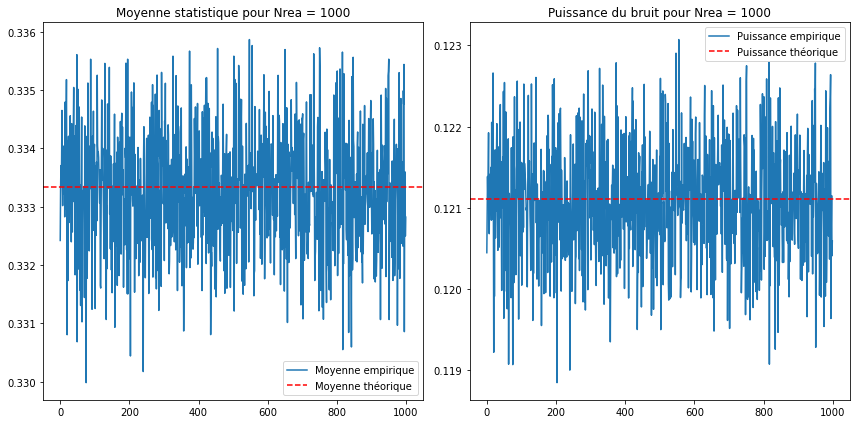

In [9]:
mv = 1/3
variance_value = 0.01
Nrea = 1000
N = 10000

simuler_bruit(mv, variance_value, Nrea, N)

<h1>Question 4

Autocorrélation pour P = 5 :
k     Empirique   xcorr     Theorique
0     0.4973     0.4973     0.5000
1     -0.0009     -0.0009     0.0000
2     0.0009     0.0009     0.0000
3     0.0048     0.0048     0.0000
4     0.0004     0.0004     0.0000


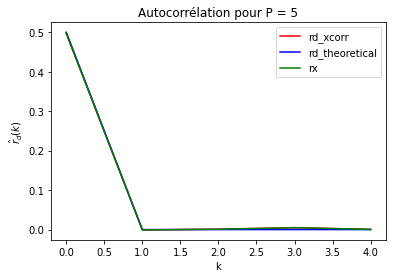

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
N = 100000
n_vec = np.arange(1, N+1)
w0 = 0.05 * np.pi
P = 5

# Génération du signal x
phi_vect = 2 * np.pi * np.random.rand(N)
x = np.sin(n_vec * w0 + phi_vect)

# Calcul de l'autocorrélation empirique (rx)
rx = np.zeros(P)
for k in range(P):
    for n in range(k + 1, N):
        rx[k] += x[n] * x[n - k]
    rx[k] /= (N - k)

# Calcul de l'autocorrélation avec np.correlate pour comparaison (rd_xcorr)
rd_xcorr = np.correlate(x, x, mode='full')[len(x)-1:len(x)-1+P]/len(x) 


# Valeurs théoriques (rd_theo)
rd_theo = np.zeros(P)
rd_theo[0] = 0.5

# Affichage et comparaison des résultats
print('Autocorrélation pour P = 5 :')
print('k     Empirique   xcorr     Theorique')
for k in range(P):
    print(f'{k}     {rx[k]:.4f}     {rd_xcorr[k]:.4f}     {rd_theo[k]:.4f}')

# Tracé des résultats
plt.figure()
plt.plot(rd_xcorr, 'r', label='rd_xcorr')
plt.plot(rd_theo, 'b', label='rd_theoretical')
plt.plot(rx, 'g', label='rx')
plt.legend()
plt.title(f'Autocorrélation pour P = {P}')
plt.xlabel('k')
plt.ylabel(r'$\hat{r}_d(k)$')
plt.show()


<h1>Question 5

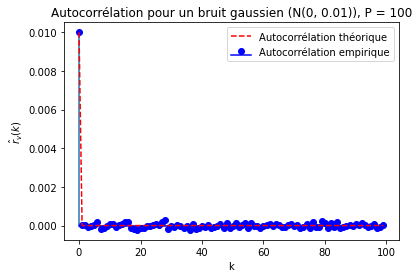

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du bruit
N = 10000
P = 100
mean_value = 0
variance = 0.01

# Génération du bruit gaussien
v = np.random.normal(loc=mean_value, scale=np.sqrt(variance), size=N)

# Calcul de l'autocorrélation symétrique avec xcorr
autocorr = np.correlate(v, v, mode='full')[N-1:N+P-1] / (N - np.arange(P))

# Propriétés théoriques d'un bruit blanc
theoretical_autocorr = np.zeros(P)
theoretical_autocorr[0] = variance

# Affichage des résultats
plt.stem(autocorr, label='Autocorrélation empirique', basefmt='b', markerfmt='bo')
plt.plot(theoretical_autocorr, 'r--', label='Autocorrélation théorique')
plt.title(f'Autocorrélation pour un bruit gaussien (N(0, 0.01)), P = {P}')
plt.xlabel('k')
plt.ylabel(r'$\hat{r}_v(k)$')
plt.legend()
plt.show()


<p>Si le bruit est blanc, l'autocorrélation devrait être proche de zéro pour tous les retards (k != 0) et égale à la variance pour k=0.
Donc le bruit est blanc !!

<h1>Question 6

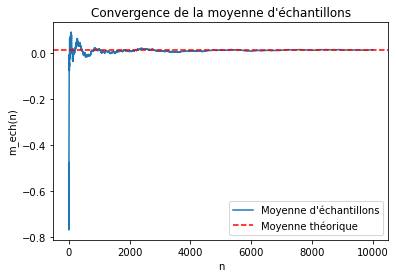

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
N = 10000
w0 = 0.05 * np.pi

# Génération du signal d
n = np.arange(1, N + 1)
phi = 2 * np.pi * np.random.rand(N)
d = np.sin(n * w0 + phi)

# Calcul de la moyenne d'échantillons
m_ech = np.cumsum(d) / n

# Affichage de la moyenne d'échantillons
plt.plot(n, m_ech, label='Moyenne d\'échantillons')
plt.axhline(y=np.mean(d), color='r', linestyle='--', label='Moyenne théorique')
plt.title('Convergence de la moyenne d\'échantillons')
plt.xlabel('n')
plt.ylabel('m_ech(n)')
plt.legend()
plt.show()


<p>La courbe obtenue converge vers la moyenne théorique du signal, représentée par la ligne en pointillés rouges.

<h1>Question 6'

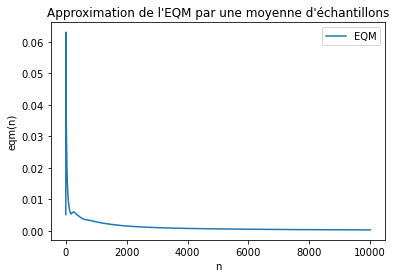

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
N = 10000
w0 = 0.05 * np.pi

# Génération du signal d
n = np.arange(1, N + 1)
phi = 2 * np.pi * np.random.rand(N)
d = np.sin(n * w0 + phi)

# Calcul de la moyenne d'échantillons
m_ech = np.cumsum(d) / n

# Calcul de l'erreur quadratique moyenne (EQM)
eqm = np.cumsum((m_ech - 0)**2) / n

# Affichage de l'EQM
plt.plot(n, eqm, label='EQM')
plt.title('Approximation de l\'EQM par une moyenne d\'échantillons')
plt.xlabel('n')
plt.ylabel('eqm(n)')
plt.legend()
plt.show()


<p> l'EQM décroît à mesure que n augmente. l'EQM converge vers zéro, cela suggère que la moyenne d'échantillons converge vers la moyenne théorique avec le temps

C:\Users\houss\AppData\Local\Temp\ipykernel_23080\1257621524.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, x = wavfile.read("audio1.wav")


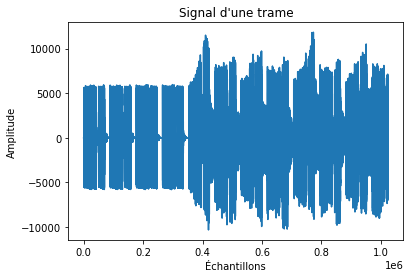

(1024000,)
(1024, 1000)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Paramètres
Lt = 1024
Nt = 1000

# Charger le fichier audio (remplacez "song.wav" par le chemin de votre fichier audio)
Fs, x = wavfile.read("audio1.wav")

x = x[:, 0]

# Sélectionner Nt trames consécutives
start_frame = 0
vec_sig = x[start_frame * Lt:(start_frame + Nt) * Lt]

# Afficher le signal d'une trame
plt.plot(vec_sig)
plt.title('Signal d\'une trame')
plt.xlabel('Échantillons')
plt.ylabel('Amplitude')
plt.show()

print(vec_sig.shape)
# Segmenter le signal en trames de longueur Lt
Xmat = vec_sig.reshape((Lt, Nt), order='F')

# Afficher les dimensions de la matrice Xmat
print(Xmat.shape)


<h1>Question 8

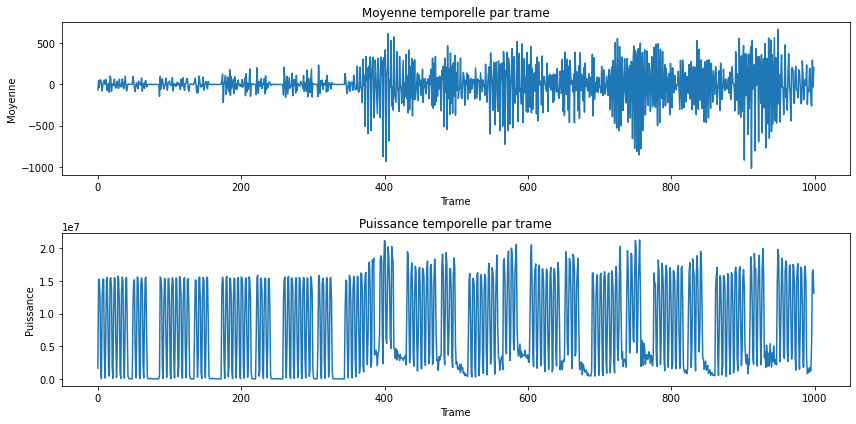

In [12]:
# Calculer la moyenne et la puissance temporelle pour chaque trame
moyenne_temporelle = np.mean(Xmat, axis=0)
puissance_temporelle = np.var(Xmat, axis=0)

# Afficher les résultats
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(moyenne_temporelle)
plt.title('Moyenne temporelle par trame')
plt.xlabel('Trame')
plt.ylabel('Moyenne')

plt.subplot(2, 1, 2)
plt.plot(puissance_temporelle)
plt.title('Puissance temporelle par trame')
plt.xlabel('Trame')
plt.ylabel('Puissance')

plt.tight_layout()
plt.show()


<p>la moyenne varie, cela indique des variations significatives dans le contenu moyen du signal au fil du temps. <br>
La variations dans la puissance temporelle indique des changements dans l'énergie du signal d'une trame à l'autre.

<h1>Question 9

(256000,)


C:\Users\houss\AppData\Local\Temp\ipykernel_23080\857597809.py:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(moyenne_temporelle_lt256,'r--', label='Lt = 256', linestyle='dashed')


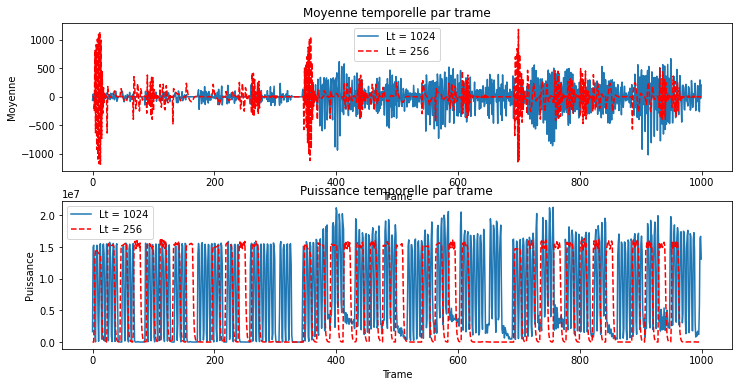

In [13]:
Lt = 256
vec_sig_lt256 = x[start_frame * Lt:(start_frame + Nt) * Lt]

print(vec_sig_lt256.shape)

# Segmenter le signal en trames de longueur Lt
Xmat_lt256 = vec_sig_lt256.reshape((Lt, Nt), order='F')  # Lt = 256, mais vous aurez 4 fois plus de trames

# Calculer la moyenne et la puissance temporelle pour chaque trame Lt = 256
moyenne_temporelle_lt256 = np.mean(Xmat_lt256, axis=0)
puissance_temporelle_lt256 = np.var(Xmat_lt256, axis=0)

# Afficher les résultats
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(moyenne_temporelle, label='Lt = 1024')
plt.plot(moyenne_temporelle_lt256,'r--', label='Lt = 256', linestyle='dashed')
plt.title('Moyenne temporelle par trame')
plt.xlabel('Trame')
plt.ylabel('Moyenne')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(puissance_temporelle, label='Lt = 1024')
plt.plot(puissance_temporelle_lt256,'r--', label='Lt = 256')
plt.title('Puissance temporelle par trame')
plt.xlabel('Trame')
plt.ylabel('Puissance')
plt.legend()


plt.show()

<p>On remarque que plus la longueur de la trame est petite plus la moyenne des
échantillons est dense on peut dire que le signal est compressé

<h1>Question 10

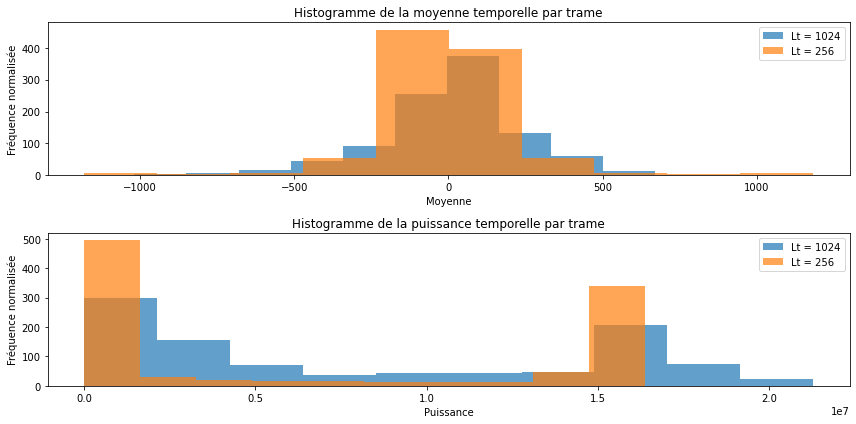

In [14]:
# Afficher les histogrammes
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.hist(moyenne_temporelle, bins=10, alpha=0.7, label='Lt = 1024')
plt.hist(moyenne_temporelle_lt256, bins=10, alpha=0.7, label='Lt = 256')
plt.title('Histogramme de la moyenne temporelle par trame')
plt.xlabel('Moyenne')
plt.ylabel('Fréquence normalisée')
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(puissance_temporelle, bins=10, alpha=0.7, label='Lt = 1024')
plt.hist(puissance_temporelle_lt256, bins=10, alpha=0.7, label='Lt = 256')
plt.title('Histogramme de la puissance temporelle par trame')
plt.xlabel('Puissance')
plt.ylabel('Fréquence normalisée')
plt.legend()

plt.tight_layout()
plt.show()

<h1>Question 10'

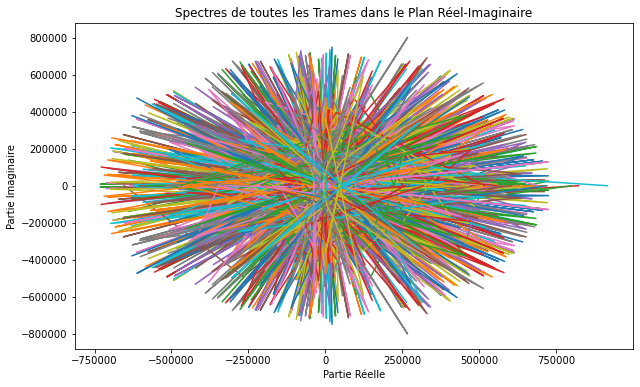

In [15]:
# Calculer la TFD de chaque trame avec une FFT à 256 points
spec_mat = np.fft.fft(Xmat, axis=0, n=256)

# Afficher la partie réelle sur l'axe des abscisses et la partie imaginaire sur l'axe des ordonnées
plt.figure(figsize=(10, 6))
for i in range(Nt):
    plt.plot(spec_mat.real[:, i], spec_mat.imag[:, i], label=f'Trame {i}')

plt.title('Spectres de toutes les Trames dans le Plan Réel-Imaginaire')
plt.xlabel('Partie Réelle')
plt.ylabel('Partie Imaginaire')

plt.show()


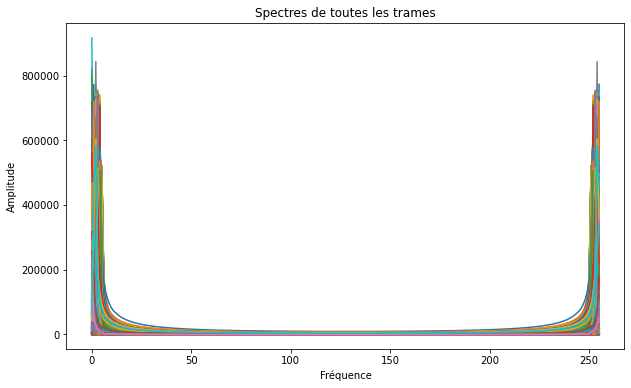

In [16]:
# Calculer la TFD de chaque trame avec une FFT à 256 points
spec_mat = np.fft.fft(Xmat, axis=0, n=256)

# Afficher les spectres de toutes les trames
plt.figure(figsize=(10, 6))
for i in range(Nt):
    plt.plot(np.abs(spec_mat[:, i]))

plt.title('Spectres de toutes les trames')
plt.xlabel('Fréquence')
plt.ylabel('Amplitude')
plt.show()

<p>Les composantes significatives du spectre représentent les fréquences importantes présentes dans une trame du signal audio. Ces fréquences sont identifiables par leur amplitude élevée dans le spectre, indiquant ainsi les caractéristiques distinctives du contenu sonore dans cette partie du signal. Nous pouvons observer ces composantes en affichant le spectre d'une trame spécifique

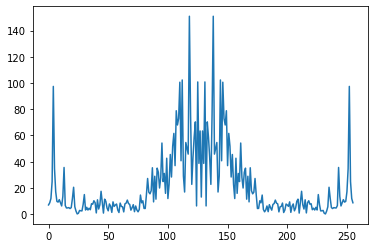

In [17]:
plt.plot(np.abs(spec_mat[:, 256]))

<h1>Question 11

In [23]:
# Réduction à 128 composantes significatives
spec_mat = spec_mat[:128, :]

# Création du vecteur de fréquences réelles
Fs2 = Fs * Lt / 256
freq_vector = np.arange(128) * Fs2 / 256


In [24]:
freq_vector

array([    0.      ,   172.265625,   344.53125 ,   516.796875,
         689.0625  ,   861.328125,  1033.59375 ,  1205.859375,
        1378.125   ,  1550.390625,  1722.65625 ,  1894.921875,
        2067.1875  ,  2239.453125,  2411.71875 ,  2583.984375,
        2756.25    ,  2928.515625,  3100.78125 ,  3273.046875,
        3445.3125  ,  3617.578125,  3789.84375 ,  3962.109375,
        4134.375   ,  4306.640625,  4478.90625 ,  4651.171875,
        4823.4375  ,  4995.703125,  5167.96875 ,  5340.234375,
        5512.5     ,  5684.765625,  5857.03125 ,  6029.296875,
        6201.5625  ,  6373.828125,  6546.09375 ,  6718.359375,
        6890.625   ,  7062.890625,  7235.15625 ,  7407.421875,
        7579.6875  ,  7751.953125,  7924.21875 ,  8096.484375,
        8268.75    ,  8441.015625,  8613.28125 ,  8785.546875,
        8957.8125  ,  9130.078125,  9302.34375 ,  9474.609375,
        9646.875   ,  9819.140625,  9991.40625 , 10163.671875,
       10335.9375  , 10508.203125, 10680.46875 , 10852.

<h1>Question 12

C:\Users\houss\AppData\Local\Temp\ipykernel_23080\632089856.py:2: RuntimeWarning: divide by zero encountered in log10
  spec_dB = 20 * np.log10(np.abs(spec_mat))


Text(0.5, 0.92, 'Spectre d amplitude (dB) - Affichage 3D')

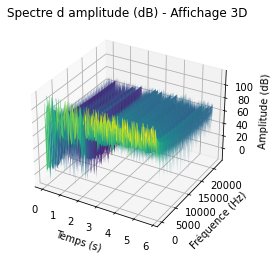

In [25]:
# Calcul du spectre en dB
spec_dB = 20 * np.log10(np.abs(spec_mat))

# Création du vecteur temps
time_vector = np.arange(1, Nt + 1) * Lt / Fs

# Affichage en 3D avec plot_surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
time_matrix, freq_matrix = np.meshgrid(time_vector, freq_vector)
ax.plot_surface(time_matrix, freq_matrix, spec_dB, cmap='viridis', edgecolor='none')
ax.set_xlabel('Temps (s)')
ax.set_ylabel('Fréquence (Hz)')
ax.set_zlabel('Amplitude (dB)')
ax.set_title('Spectre d amplitude (dB) - Affichage 3D')


<p>Pour générer le vecteur temps, on doit diviser le nombre total d'échantillons par la fréquence d'échantillonnage. Cela nous donnera la durée totale du signal en secondes. Ensuite, on doit diviser cette durée totale en segments de trames pour obtenir le vecteur temps correspondant à chaque trame.

<p>
La ligne de code time_vector = np.arange(1, Nt + 1) * Lt / Fs génère un vecteur de temps en fonction du nombre de trames Nt, de la longueur de chaque trame Lt, et de la fréquence d'échantillonnage Fs.

* np.arange(1, Nt + 1) crée un tableau numpy qui commence à 1 et se termine à Nt + 1. Cela représente le nombre de trames, car nous voulons que le vecteur de temps commence à 1 et atteigne Nt.

* Lt / Fs multiplie chaque élément du tableau par la longueur d'une trame (Lt) divisée par la fréquence d'échantillonnage (Fs). Cela convertit le nombre d'échantillons en secondes, donnant ainsi le temps associé à chaque trame.